In [1]:
import numpy as np
import librosa
import aubio
import matplotlib.pyplot as plt
import librosa.display
import pandas as pd

In [5]:
# %load analyzeAudio.py
"""
analyzeAuio.py

This function returns a structure of note-wise paramters for the segmented 
note audio that is inputted

"""

def analyzeAudio(file, n_fft=2048, hop_length=512, n_chroma=12, n_mfcc=13):

    import librosa
    import aubio

    win_s = hop_length * 4

    sig , sr = librosa.load(file,mono=True,sr=None)
    aubioSource = aubio.source(file, 0, hop_length)

#    class audioData:
#        pass
#    
#    audioVals = audioData()
    
    audioVals = {}
    
    audioVals['file'] = file
    
    # fundamental frequency
    samplerate = aubioSource.samplerate
    tolerance = 0.1
    pitch_o = aubio.pitch("yin", win_s, hop_length, samplerate) 
    pitch_o.set_tolerance(tolerance)
    pitchesYIN = []
    confidences = [] 
    total_frames = 0
    while True:
        samples, read = aubioSource()
        pitch = pitch_o(samples)[0]
        pitch = int(round(pitch))
        confidence = pitch_o.get_confidence()
        pitchesYIN += [pitch]
        confidences += [confidence]
        total_frames += read
        if read < hop_length:
             break
    audioVals['f0'] = pitchesYIN    
    audioVals['f0confidence'] = confidences
    
    
    audioVals['rms'] = librosa.feature.rmse(y=sig)
                
    # harmonic component of the signal
    sig_harmonic, sig_percussive = librosa.effects.hpss(sig)
    
    #stft chroma
    audioVals['twelveChroma'] = librosa.feature.chroma_cqt(y=sig_harmonic,sr=sr, n_chroma=12)
    
    # mfccs    
    audioVals['mfcc'] = librosa.feature.mfcc(y=sig, sr=sr, hop_length=512, n_mfcc=13)
    
    # spectral centroid
    audioVals['specCent']=librosa.feature.spectral_centroid(y=sig, sr=sr, n_fft=2048, hop_length=512, freq=None)
    
    # spectral bandwidth
    audioVals['specBand']=librosa.feature.spectral_bandwidth(y=sig, sr=sr, n_fft=2048, hop_length=512, freq=None)
    
    # spectral contrast
    audioVals['specContrast']=librosa.feature.spectral_contrast(y=sig, sr=sr, n_fft=2048, hop_length=512, freq=None)
    
    # spectral flatness
    audioVals['specFlatness']=librosa.feature.spectral_flatness(y=sig)

    return audioVals

In [31]:
def plotFeatures(audiodDataList,dataTypes, index, dimIdx, fileList):
    plt.figure(figsize=(12, 8))
    plt.title(fileList[index]+ '.wav')
    for i in range(0,len(dataTypes)):   
        plt.subplot(4,2,i+1)    
        if dimIdx[i]  == 1:
            plt.plot(audioDataList[index][dataTypes[i]])
            plt.title(fileList[index]+ ' ' + dataTypes[i])
        if dimIdx[i] == 2:
            plt.plot(audioDataList[index][dataTypes[i]].T)
            plt.title(fileList[index]+ ' ' + dataTypes[i])
        if dimIdx[i] == 3:
            librosa.display.specshow(audioDataList[index][dataTypes[i]])
            plt.title(fileList[index]+ ' ' + dataTypes[i])
    plt.tight_layout() 
    #plt.savefig(fileList[index] + '.png')


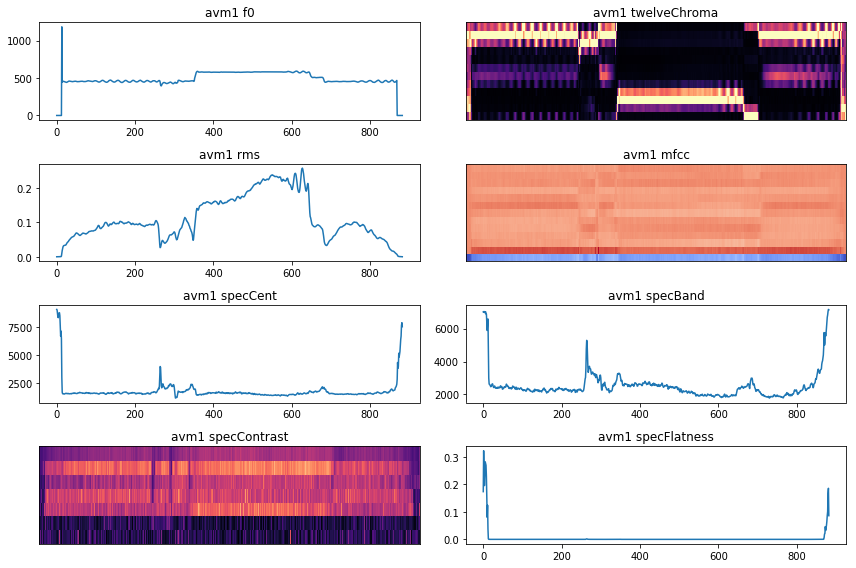

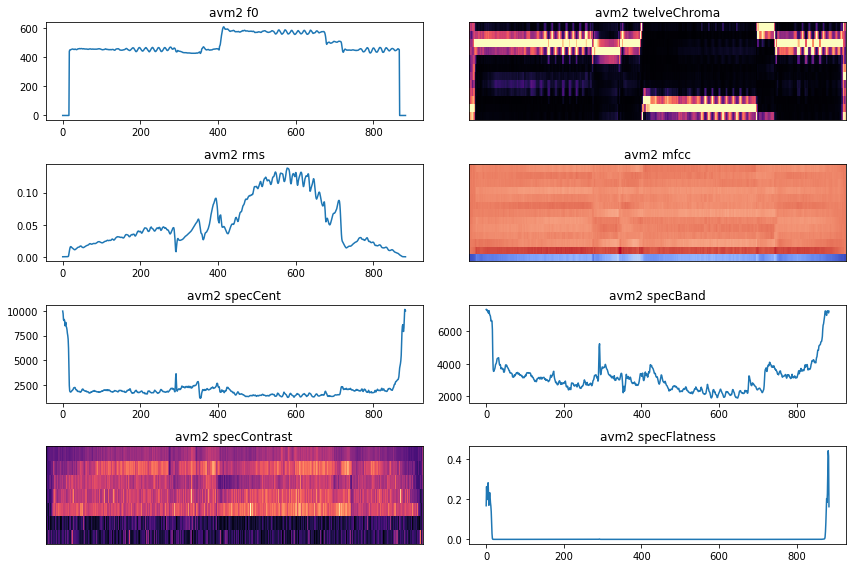

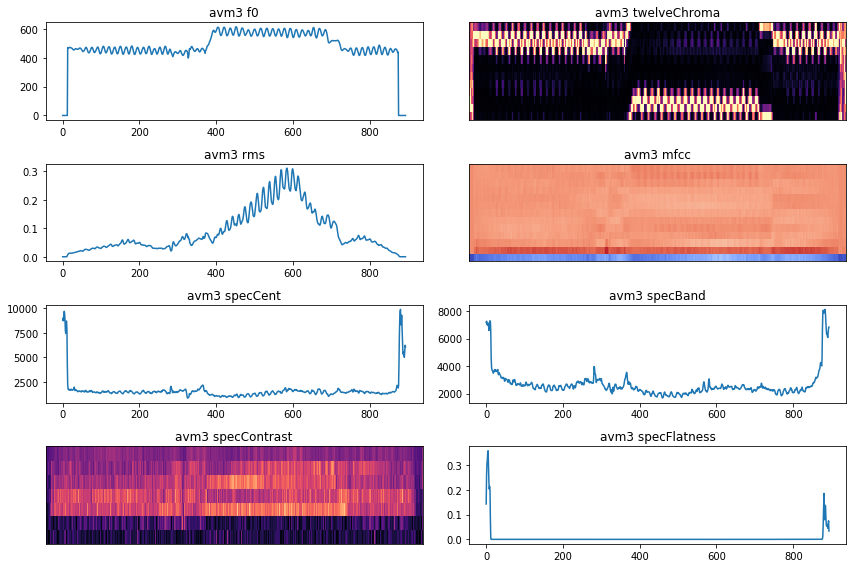

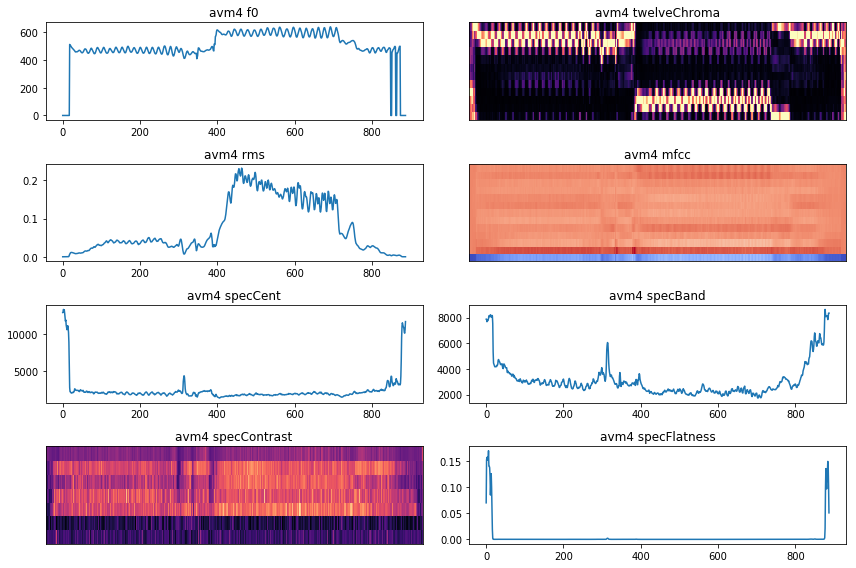

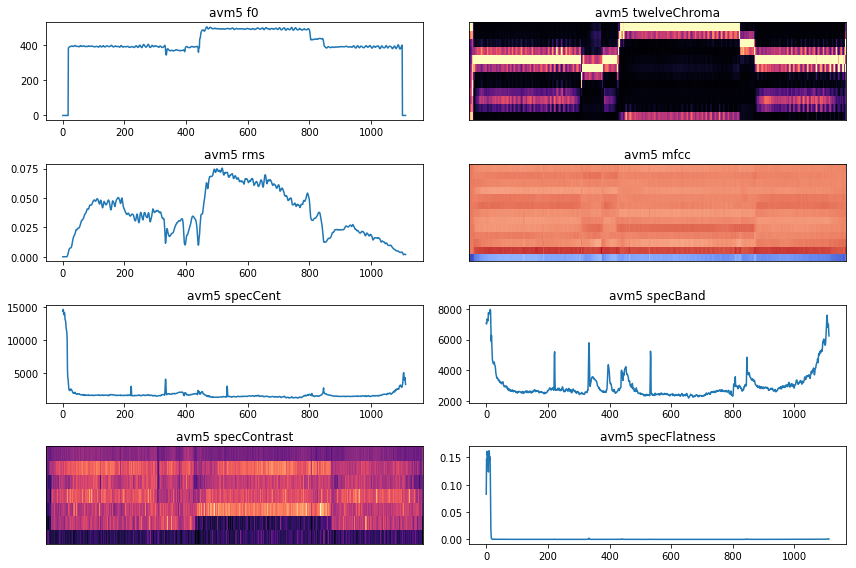

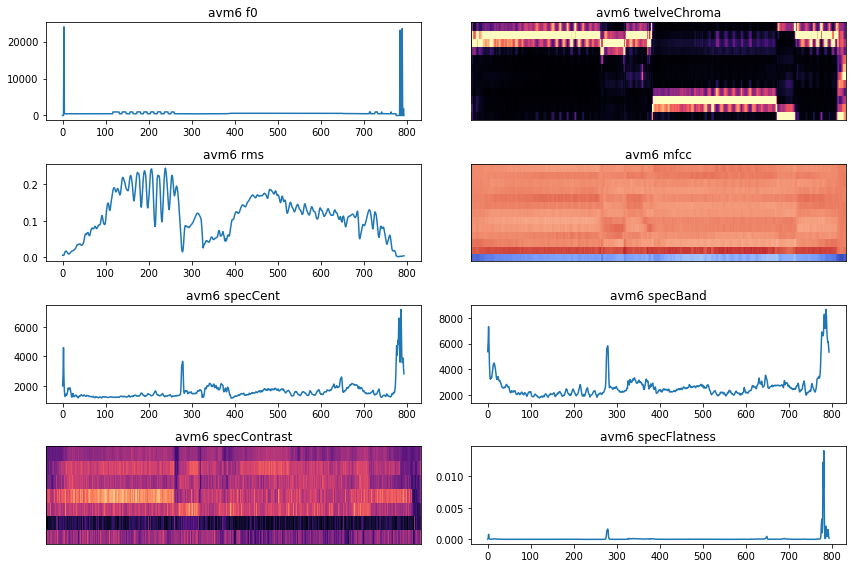

In [32]:
# analyze audio files and store the dictionaries in a list
audioDataList = []
fileList = ['avm1', 'avm2', 'avm3','avm4', 'avm5', 'avm6']
for item in fileList:
    audioDataList.append(analyzeAudio(item + '.wav'))
dataTypes = ['f0', 'twelveChroma','rms','mfcc','specCent','specBand','specContrast','specFlatness']
dimIdx = [1, 3, 2, 3, 2, 2, 3, 2]
for i in range(0,len(audioDataList)):
    plotFeatures(audioDataList,dataTypes, i, dimIdx, fileList)

